# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

from numpy.f2py.rules import numpy_version


In [526]:
data = pd.read_csv('data/forestfires.csv')

day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

data['day'] = data['day'].map(day_mapping)
data['month'] = data['month'].map(month_mapping)

X_initial = data[["X","Y", "month",	"day",	"FFMC",	"DMC", "DC", "ISI",	"temp",	"RH",	"wind",	"rain"]]
Y_initial = data[["area"]]

X_initial.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [527]:
Y_initial.head()

,area
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [528]:
def h(X, W):
    return np.dot(X, W)

In [529]:
def Error(X, W, Y,lam):
  return np.sum((Y - h(X, W)) ** 2) / (2 * len(X)) + lam * np.sum(W ** 2) / (2 * len(X))
  # return (np.linalg.norm(Y - h(X, W)) ** 2) / (2 * len(X)) + lam * np.sum(W ** 2)
  # return np.sum((Y - h(X, W)) ** 2) / (2 * len(X)) + lam * np.sum(abs(W))

# * np.sum(W ** 2)

In [530]:
def derivada(X, W, Y, lam):
    # write your code here
    # Return a (k+1)x1 vector. This vector contains the derivatives from Loss function
    # respect to all variable w_j
    yh = (Y-h(X, W)).transpose()

    
    dwj = np.dot(yh, -1 * X).transpose() / len(Y) + 2 * lam * W / len(Y)
    # dwj = np.dot(yh, -1 * X).transpose() / len(Y) +  lam 
    return dwj

In [531]:
def update(W,  dW, alpha):
  # write your code here
  return W - dW * alpha

In [717]:
def train(X, Y, epochs, alfa,lam):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[1])])
    # print(W)
    L = Error(X,W,Y,lam)
    # print("Inicial", L)
    loss = []
    for i in range(epochs):
        dW = derivada(X, W, Y,lam)
        W = update(W, dW, alfa)
        L = Error(X, W,Y,lam)
        loss.append(L)
        if i % 1000 == 0:
            L = Error(X, W, Y, lam)
            # print(f"Epoch {i}, Loss: {L}")
    # print(W)
    return W, loss

In [533]:
#Plotear la ecuación
def conver_matrix(X, p):
  potencia = [i for i in range(p)]
  XX = [ [ e**i for e in X ] for i in potencia]
  return np.array(XX).T



In [534]:
def conver_matrix2(X, p):
    n_cols = X.shape[1]
    XX = np.hstack([X**i for i in range(p)])
    return np.array(XX)  

In [535]:
def r2_adjusted(y_true, y_pred, p):
    den_r2 = (y_true - np.mean(y_true)) ** 2
    num_r2 = (y_pred - np.mean(y_true)) ** 2
    r2 = np.sum(num_r2) / np.sum(den_r2)

    num = len(y_true) - 1
    den = len(y_true) - p - 1
    return 1 - (1 - r2) * (num / den)

In [536]:
# x_isi = np.array(X_initial["ISI"])
# y_area = np.log(2 + np.array(Y_initial["area"]))
# 
# x_isi  = (min(x_isi) - x_isi)/(max(x_isi) - min(x_isi))
# y_area  = (min(y_area) - y_area)/(max(y_area) - min(y_area))
# 
# xx_isi = conver_matrix(x_isi,6)

# w , loss = train(xx_isi,y_area, 10000, 0.9, 0.1)
# 
# 
# plt.plot(x_isi,y_area,"*")
# y_aprox = h(xx_isi,w)
# 
# 
# plt.plot(x_isi,y_aprox,"o")

In [537]:
from sklearn.metrics import r2_score

x_vars = np.array(X_initial[["X","Y", "month",	"day",	"FFMC",	"DMC", "DC", "ISI",	"temp",	"RH",	"wind",	"rain"]])

# y_area = np.array(Y_initial["area"])
y_area = np.log(1 + np.array(Y_initial["area"]))



for i in range(x_vars.shape[1]):
    
    col = x_vars[:, i]  # Get the column
    col = (col - np.min(col)) / (np.max(col) - np.min(col))  # Apply the transformation
    x_vars[:, i] = col  # Update the column in the original matrix
    


y_norm  =  (y_area - min(y_area))/(max(y_area) - min(y_area))



In [538]:
# Split
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x_vars, y_norm, random_state=104, test_size=0.30, shuffle=True)

### Multivariate Linear Regression

0.1240820719540498
[ 0.05150824 -0.02558304  0.25219125 -0.00938213 -0.01763986  0.14143657
 -0.15956831 -0.18996399 -0.03052963 -0.13202924  0.07629658  0.12426005]


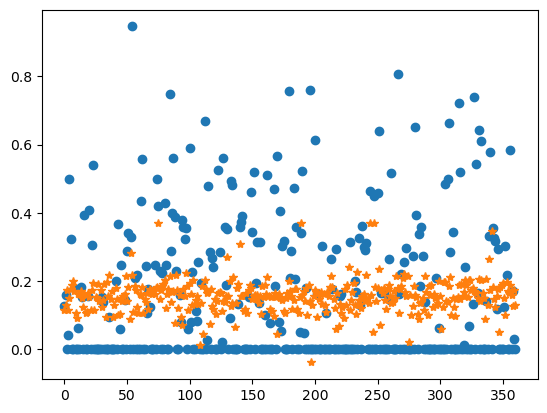

In [539]:
from sklearn import linear_model

# regr = linear_model.LinearRegression()
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred_lin = regr.predict(x_train)
plt.plot(y_train, "o")
plt.plot(y_pred_lin, "*")

print(regr.intercept_)
print(regr.coef_)

In [540]:
print("R2 train:", r2_adjusted(y_train,y_pred_lin, 12))
print("R2 test:", r2_adjusted(y_test,regr.predict(x_test), 12))

R2 train: 0.022014275051197796
R2 test: -0.04965376438636104


### Multivariate Polynomial Regression (own)

-35073288851040.137


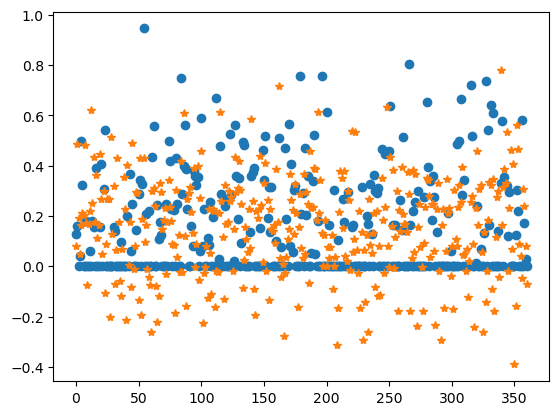

In [541]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

poly = PolynomialFeatures(degree=2)

# x_vars_poly = poly.fit_transform(x_vars)
# min_vals_poly = np.min(x_vars_poly)
# max_vals_poly = np.max(x_vars_poly)
# 
# X_poly = (x_vars_poly - min_vals_poly) / (max_vals_poly - min_vals_poly)
X_poly = poly.fit_transform(x_train)

model = LinearRegression()
model.fit(X_poly, y_train)
y_pred_pol = model.predict(X_poly)


# y_pred_pol = np.dot(X_poly, model.coef_)
# print(x_vars_poly.shape)

plt.plot(y_train, "o")
plt.plot(y_pred_pol, "*")

print(model.intercept_)
# print(model.coef_)

In [542]:
print("R2 train:", r2_adjusted(y_train,y_pred_pol, X_poly.shape[1]))
X_poly_lib_test = poly.fit_transform(x_test)
print("R2 test:", r2_adjusted(y_test,model.predict(X_poly_lib_test), X_poly.shape[1]))

R2 train: 0.9831709102818552
R2 test: 3.679224116419126


### Multivariate Polynomial Regression without fit (implementacion del polinomio con libreria)

Inicial 62.192764904844275
Epoch 0, Loss: 61.52904625617467
Epoch 1000, Loss: 0.5192940236149355
Epoch 2000, Loss: 0.3933669388589663
Epoch 3000, Loss: 0.3074922995864418
Epoch 4000, Loss: 0.24719129264125125
Epoch 5000, Loss: 0.20402147682444047
Epoch 6000, Loss: 0.17253073381373626
Epoch 7000, Loss: 0.14913713462642902
Epoch 8000, Loss: 0.13144743953188423
Epoch 9000, Loss: 0.11783652815654284
Epoch 10000, Loss: 0.10718388193150424
Epoch 11000, Loss: 0.09870583302780646
Epoch 12000, Loss: 0.09184704225403346
Epoch 13000, Loss: 0.08620916429276806
Epoch 14000, Loss: 0.08150322861713552
Epoch 15000, Loss: 0.07751738504225253
Epoch 16000, Loss: 0.07409475915556335
Epoch 17000, Loss: 0.07111805984042388
Epoch 18000, Loss: 0.06849875984320063
Epoch 19000, Loss: 0.06616941373303106
Epoch 20000, Loss: 0.06407815363297165
Epoch 21000, Loss: 0.062184712586263985
Epoch 22000, Loss: 0.06045752962318716
Epoch 23000, Loss: 0.058871627231268014
Epoch 24000, Loss: 0.057407044558179195
Epoch 25000, 

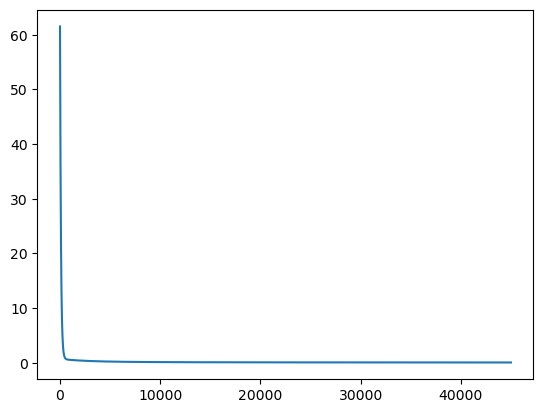

In [708]:
X_poly_ones = np.hstack( (np.ones((X_poly.shape[0], 1)), X_poly) )
w2 , loss2 = train(X_poly_ones,y_train, 45000, 0.0005, 0.2)
plt.plot(loss2)


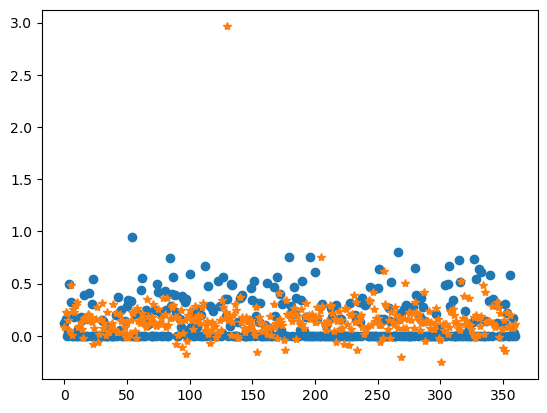

In [709]:
y_aprox2 = h(X_poly_ones, w2)
# y_aprox = h(X_poly,w)
plt.plot(y_train, "o")
plt.plot(y_aprox2, "*")



In [710]:
print("R2 train:", r2_adjusted(y_train, y_aprox2, X_poly.shape[1] - 1))
X_test_poly = poly.fit_transform(x_test)
X_test_poly_ones = np.hstack( (np.ones((X_test_poly.shape[0], 1)), X_test_poly) )
print("R2 test:", r2_adjusted(y_test, h(X_test_poly_ones , w2),  X_poly.shape[1] - 1))

R2 train: 0.883472317038275
R2 test: 0.24475378545602022


### Multivariate Linnear Regression (own)

Inicial 3.592005742409025
Epoch 0, Loss: 3.5777826873336758
Epoch 1000, Loss: 0.1058671933975373
Epoch 2000, Loss: 0.04244009554131383
Epoch 3000, Loss: 0.04053349598633965
Epoch 4000, Loss: 0.03977891020320162
Epoch 5000, Loss: 0.039084124388170494
Epoch 6000, Loss: 0.038426332595799285
Epoch 7000, Loss: 0.0378023204281383
Epoch 8000, Loss: 0.03720950048808534
Epoch 9000, Loss: 0.036645541171586714
Epoch 10000, Loss: 0.03610833379490489
Epoch 11000, Loss: 0.03559596872586241
Epoch 12000, Loss: 0.035106714278698756
Epoch 13000, Loss: 0.03463899796505098
Epoch 14000, Loss: 0.03419138982948639


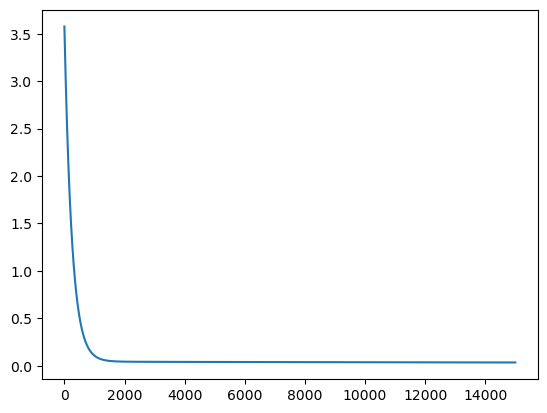

In [660]:
x_linnear = np.hstack((np.ones((x_train.shape[0], 1)), x_train))

w3 , loss3 = train(x_linnear, y_train, 15000, 0.0005, 0.01)


y_aprox3 = h(x_linnear,w3)

plt.plot(loss3)


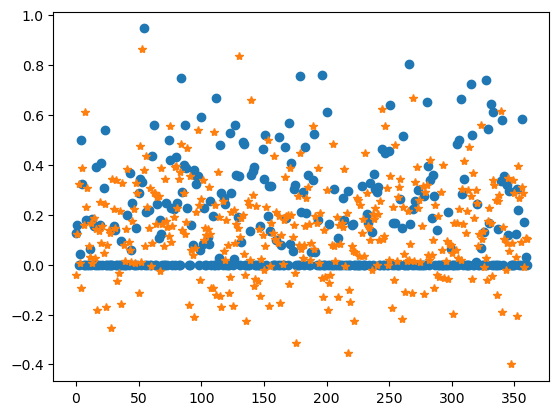

In [661]:
# y_aprox = h(X_poly,w)
plt.plot(y_train, "o")
plt.plot(y_aprox3, "*")


In [662]:
print("R2 train:", r2_adjusted(y_train, y_aprox3, 12))
X_test_lin = np.hstack( (np.ones((x_test.shape[0], 1)), x_test) )

print("R2 test:", r2_adjusted(y_test, h(X_test_lin , w3), 12))

R2 train: 0.8778003096554994
R2 test: 0.7144262424301946


### 10-fold Cross Validation   

R2 train 1 : 0.5586044896116407
R2 test: 1 : 0.22341406326161528
R2 train 2 : 0.5557317624772871
R2 test: 2 : 0.3840346436533003
R2 train 3 : 0.5542124861943201
R2 test: 3 : 0.4332807299534355
R2 train 4 : 0.5660130245186569
R2 test: 4 : 0.06531925047746268
R2 train 5 : 0.5327511569647574
R2 test: 5 : 0.7291871406253865
R2 train 6 : 0.5637086546623966
R2 test: 6 : 0.6722148065896147
R2 train 7 : 0.5532780668444843
R2 test: 7 : 0.6811934419820866
R2 train 8 : 0.5921430719277914
R2 test: 8 : 0.3271668458371991
R2 train 9 : 0.5373016567898952
R2 test: 9 : 0.786737521509789
R2 train 10 : 0.5385146282060117
R2 test: 10 : 0.6907455887791246


<function matplotlib.pyplot.show(close=None, block=None)>

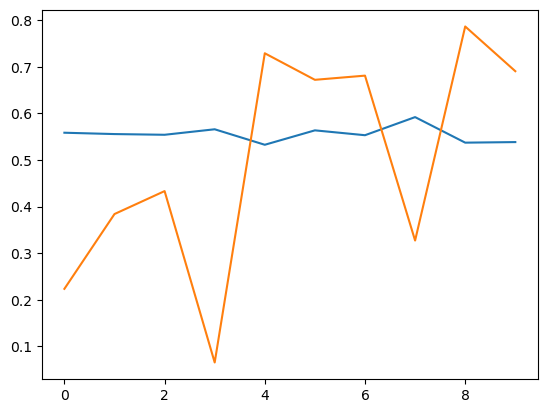

In [732]:
from sklearn.model_selection import KFold


n_folds = 10
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)

r2_scores_train = []
r2_scores_test = []

i = 0
for train_index, test_index in kfold.split(x_vars, y_norm):
    i = i + 1
    x_traink, x_testk = x_vars[train_index], x_vars[test_index]
    y_traink, y_testk = y_norm[train_index], y_norm[test_index]
    
    x_traink = np.hstack((np.ones((x_traink.shape[0], 1)), x_traink))
    
    
    w , loss = train(x_traink, y_traink, 30000, 0.0005, 0.6)
    y_aproxk = h(x_traink,w)
    
    scoreTrain =r2_adjusted(y_traink, y_aproxk, 12)
    r2_scores_train.append(scoreTrain)
    
    x_testk = np.hstack((np.ones((x_testk.shape[0], 1)), x_testk))
    scoreTest = r2_adjusted(y_testk, h(x_testk , w), 12)
    r2_scores_test.append(scoreTest)
    
    print("R2 train" , i, ":", scoreTrain)
    
    print("R2 test:", i, ":", scoreTest)

plt.plot(r2_scores_train)
plt.plot(r2_scores_test)
plt.show